In [1]:
import time
import os

from PIL import Image

In [2]:
from tensorboardX import SummaryWriter

In [3]:
from parsers import parameter_parser
opt = parameter_parser()

In [4]:
import torch
import torch.backends.cudnn as cudnn

In [5]:
if torch.cuda.is_available() and not opt.cuda:
    print("WARNING: You have a CUDA device, "
        "so you should probably run with --cuda")

In [6]:
# If true, cause cuDNN to benchmark multiple convs algs and select the fastest
cudnn.benchmark = True

In [7]:
cur_time = time.strftime('%Y-%m-%d-%H_%M_%S', time.localtime())
experiment_dir = opt.hostname  + "_" + opt.remark + "_" + cur_time
experiment_dir

'DESKTOP-TTGGT9S__2021-09-14-09_19_48'

In [8]:
opt.outckpts += experiment_dir + "/checkPoints"
opt.trainpics += experiment_dir + "/trainPics"
opt.validationpics += experiment_dir + "/validationPics"
opt.outlogs += experiment_dir + "/trainingLogs"
opt.outcodes += experiment_dir + "/codes"
opt.testPics += experiment_dir + "/testPics"
opt.runfolder += experiment_dir + "/run"


In [9]:
opt.outckpts

'/data-x/g10/zhangjie/PAMI/exp_chk/debone/HR/DESKTOP-TTGGT9S__2021-09-14-09_19_48/checkPoints'

In [10]:
def mkdirs(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [11]:
mkdirs(opt.outckpts)
mkdirs(opt.trainpics)
mkdirs(opt.validationpics)
mkdirs(opt.outlogs)
mkdirs(opt.outcodes)
mkdirs(opt.testPics)
mkdirs(opt.runfolder)


In [12]:
str(opt)
# print the training log and save into logFiles
# 该函数作用是把log_info写入log_path指向的文件中
def print_log(log_info, log_path, console=True):
    # print the info into the console
    if console:
        print(log_info)
    # debug mode don't write the log into files
    if not opt.debug:
        # write the log into log file
        if not os.path.exists(log_path):
            fp = open(log_path, "w")
            fp.writelines(log_info + "\n")
        else:
            with open(log_path, 'a+') as f:
                f.writelines(log_info + '\n')

In [13]:
logPath = opt.outlogs + '/%s_%d_log.txt' % (opt.dataset, opt.batchSize)
print(f'logPath: {logPath}')
print_log(str(opt), logPath)

logPath: /data-x/g10/zhangjie/PAMI/exp_chk/debone/HR/DESKTOP-TTGGT9S__2021-09-14-09_19_48/trainingLogs/train_16_log.txt
Namespace(Dnet='', Hnet='', Rnet='', batchSize=16, beta=1, beta1=0.5, betaclean=1, betacleanA=1, betacleanB=1, betacons=1, betagan=1, betagans=0.01, betamse=10000, betapix=0, betavgg=0, clip=False, cuda=True, dataset='train', datasets='E:/derain', debug=False, decay_round=10, hostname='DESKTOP-TTGGT9S', imageSize=256, logFrequency=10, lr=0.0002, ngpu=1, niter=200, num_downs=7, outckpts='/data-x/g10/zhangjie/PAMI/exp_chk/debone/HR/DESKTOP-TTGGT9S__2021-09-14-09_19_48/checkPoints', outcodes='/data-x/g10/zhangjie/PAMI/exp_chk/debone/HR/DESKTOP-TTGGT9S__2021-09-14-09_19_48/codes', outlogs='/data-x/g10/zhangjie/PAMI/exp_chk/debone/HR/DESKTOP-TTGGT9S__2021-09-14-09_19_48/trainingLogs', remark='', resultPicFrequency=100, runfolder='/data-x/g10/zhangjie/PAMI/exp_chk/debone/HR/DESKTOP-TTGGT9S__2021-09-14-09_19_48/run', secret='flower', test='', testPics='/data-x/g10/zhangjie/P

In [14]:
writer = SummaryWriter(log_dir=opt.runfolder, comment='**' + opt.hostname + "_" + opt.remark)
DATA_DIR = opt.datasets
traindir = os.path.join(DATA_DIR, 'train')

# 进行数据预处理

In [15]:
import torch.utils.data as data

In [16]:
from torchvision import get_image_backend
get_image_backend()

'PIL'

In [17]:
from PIL import Image
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')
            # return img.convert('L')
            # return img


In [18]:
import torchvision.transforms as trans
import utils.transformed as transforms

from torch.utils.data import DataLoader

In [19]:
opt.datasets

'E:/derain'

In [20]:
DATA_DIR = opt.datasets
traindir = os.path.join(DATA_DIR, 'train')
valdir = os.path.join(DATA_DIR, 'val')

sorted(os.listdir(traindir))

['Rain_Heavy', 'Rain_Light', 'Rain_Medium']

In [21]:

def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')
            # return img.convert('L')
            # return img

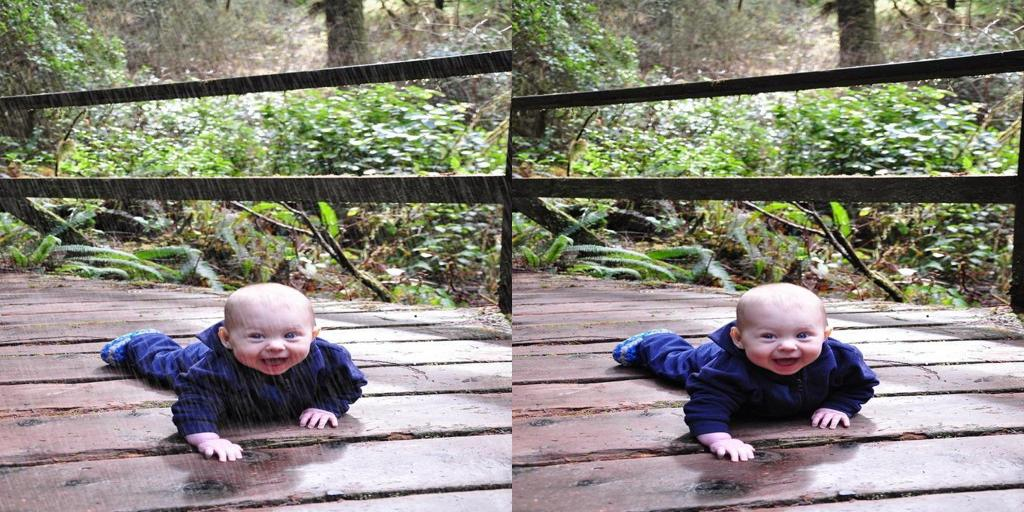

In [23]:
pil_loader('E:/derain/train/Rain_Light/0.jpg')

In [24]:
from data.ImageFolderDataset import MyImageFolder
train_dataset = MyImageFolder(
    traindir,  
    transforms.Compose([ 
        trans.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
                    
    ]))

In [25]:
train_dataset.image_list

['E:/derain\\train\\Rain_Heavy',
 'E:/derain\\train\\Rain_Light',
 'E:/derain\\train\\Rain_Medium']

In [41]:
# os.walk是递归遍历该文件夹下的所有子文件夹和file
# 从传入参数开始，将其作为root
# path是root路径, a是该path目录下的所有子文件夹, fnames是该path路径下的所有file组成的list。
# 'E:/derain\\train'下面只有子文件夹没有文件，所有fnames为空
for path, a, fnames in sorted(os.walk('E:/derain')):
    print(f'path: {path}')
    print(f'a: {a}')
    print(f'fnames: {fnames[:5]}')

path: E:/derain
a: ['test', 'testing_fu', 'train']
fnames: []
path: E:/derain\test
a: []
fnames: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
path: E:/derain\testing_fu
a: []
fnames: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']
path: E:/derain\train
a: ['Rain_Heavy', 'Rain_Light', 'Rain_Medium']
fnames: []
path: E:/derain\train\Rain_Heavy
a: []
fnames: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
path: E:/derain\train\Rain_Light
a: []
fnames: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
path: E:/derain\train\Rain_Medium
a: []
fnames: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']


In [45]:
import torch.utils.data as data

from PIL import Image
import os
import os.path

IMG_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm']


def is_image_file(filename):
    """Checks if a file is an image.

    Args:
        filename (string): path to a file

    Returns:
        bool: True if the filename ends with a known image extension
    """
    filename_lower = filename.lower()
    return any(filename_lower.endswith(ext) for ext in IMG_EXTENSIONS)


def find_classes(dir):
    # 获取dir文件夹下的子文件夹名称，并作为类别表示
    classes = [d for d in os.listdir(
        dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    # 第i个类别的编号为i
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx


def make_dataset(dir, class_to_idx):
    images = []
    # os.path.expanduser() 函数将 ~/u转换为 /home/houls/u
    #dir = os.path.expanduser(dir)
    for target in sorted(os.listdir(dir)):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if is_image_file(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    images.append(item)

    return images



In [43]:
opt.datasets
DATA_DIR = opt.datasets
traindir = os.path.join(DATA_DIR, 'train')
valdir = os.path.join(DATA_DIR, 'val')
traindir

'E:/derain\\train'

In [50]:
classes, class_to_index = find_classes(traindir)
print(classes)
print(class_to_index)

['Rain_Heavy', 'Rain_Light', 'Rain_Medium']
{'Rain_Heavy': 0, 'Rain_Light': 1, 'Rain_Medium': 2}


In [56]:
images = make_dataset(traindir, class_to_index)
print(images[:5])
images[1][0]

[('E:/derain\\train\\Rain_Heavy\\0.jpg', 0), ('E:/derain\\train\\Rain_Heavy\\1.jpg', 0), ('E:/derain\\train\\Rain_Heavy\\10.jpg', 0), ('E:/derain\\train\\Rain_Heavy\\100.jpg', 0), ('E:/derain\\train\\Rain_Heavy\\1000.jpg', 0)]


'E:/derain\\train\\Rain_Heavy\\1.jpg'

In [62]:
i1 = pil_loader(images[2][0])

In [61]:
a = transforms.Compose([ 
            # 将图像转换为灰度图像
            trans.Grayscale(num_output_channels=1),
            # Convert a PIL Image or numpy.ndarray to tensor.
            transforms.ToTensor(),
                        
        ])

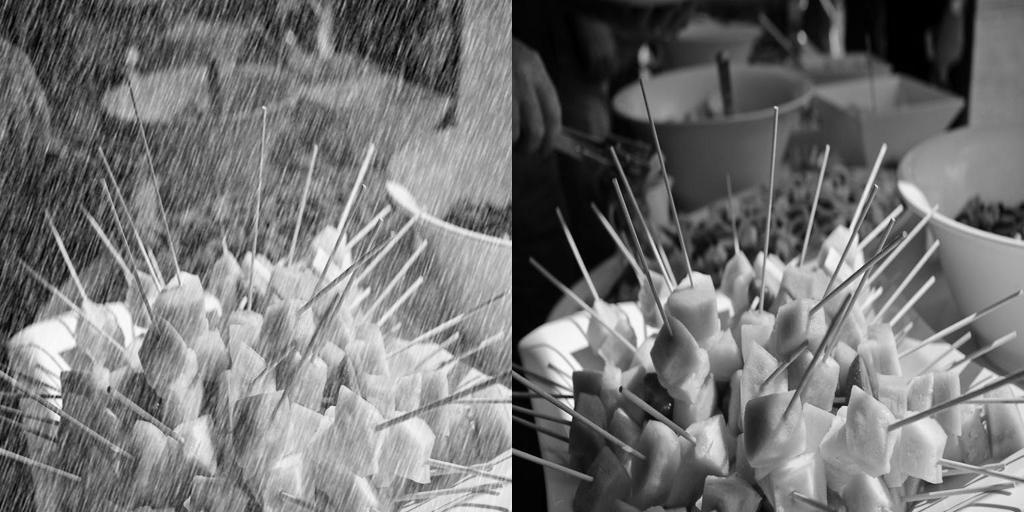

In [65]:
b = trans.Grayscale(num_output_channels=1)
b(i1)

In [63]:
a(i1)

tensor([[[0.1843, 0.0588, 0.1608,  ..., 0.3608, 0.3569, 0.3529],
         [0.1294, 0.1137, 0.1725,  ..., 0.3569, 0.3529, 0.3490],
         [0.1020, 0.1216, 0.1569,  ..., 0.3608, 0.3569, 0.3529],
         ...,
         [0.3686, 0.3804, 0.2471,  ..., 0.8157, 0.8353, 0.7843],
         [0.4314, 0.2824, 0.1765,  ..., 0.7137, 0.7961, 0.7647],
         [0.4157, 0.1922, 0.1373,  ..., 0.6314, 0.7294, 0.7137]]])

In [67]:
train_dataset = MyImageFolder(
    traindir,  
    transforms.Compose([ 
        # 将图像转换为灰度图像
        trans.Grayscale(num_output_channels=1),
        # Convert a PIL Image or numpy.ndarray to tensor.
        transforms.ToTensor(),
                    
    ]))
    
val_dataset = MyImageFolder(
    valdir,  
    transforms.Compose([  
        trans.Grayscale(num_output_channels=1),
        transforms.ToTensor(), 
    ]))
    


In [71]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    print(classname)
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)


In [73]:
from models.HidingUNet import UnetGenerator
import torch.nn as nn
Hnet = UnetGenerator(input_nc=2, output_nc=1, num_downs= opt.num_downs, output_function=nn.Sigmoid)

In [106]:
from torch.nn import BatchNorm2d as norm_layer
import torch.nn as nn

input_nc = 1
inner_nc = 8
outer_nc = 16
use_bias = False
downconv = nn.Conv2d(input_nc, inner_nc, kernel_size=4,
stride=2, padding=1, bias=use_bias)
# 激活函数是对tensor的每个元素都进行*relu判断                        
# 输出与输入相同
downrelu = nn.LeakyReLU(0.2, True)
# norm_layer输入： [batch_size, num_features, height, width]
# 此处传入的参数就传到了num_features
# 所以输入为： [batch_size, inner_nc, height, width]
# BatchNorm2d的输出与输入相同
downnorm = norm_layer(inner_nc)
uprelu = nn.ReLU(True)
# 输入为： [batch_size, outer_nc, height, width]
upnorm = norm_layer(outer_nc)
upconv = nn.ConvTranspose2d(inner_nc, outer_nc,
                            kernel_size=4, stride=2,
                            padding=1, bias=use_bias)
down = [downrelu, downconv]
up = [uprelu, upconv, upnorm]
model = down + up
#model = nn.Sequential(*model)

In [110]:
# *是取list中的元素内容
print((*model))
print()
print(model)
print()
model = nn.Sequential(*model)
print()
print(f'seq:{model}')
print()
print(f'seq [model]: {[model]}')
model = down + [model] + up + [nn.Dropout(0.5)]
print()
print(f'tress add : {model}')

LeakyReLU(negative_slope=0.2, inplace=True) Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False) Sequential(
  (0): LeakyReLU(negative_slope=0.2, inplace=True)
  (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (2): Sequential(
    (0): LeakyReLU(negative_slope=0.2, inplace=True)
    (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (2): Sequential(
      (0): LeakyReLU(negative_slope=0.2, inplace=True)
      (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (2): ReLU(inplace=True)
      (3): ConvTranspose2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, trac

In [111]:
print(nn.Sequential(*model))

Sequential(
  (0): LeakyReLU(negative_slope=0.2, inplace=True)
  (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (2): Sequential(
    (0): LeakyReLU(negative_slope=0.2, inplace=True)
    (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (2): Sequential(
      (0): LeakyReLU(negative_slope=0.2, inplace=True)
      (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (2): Sequential(
        (0): LeakyReLU(negative_slope=0.2, inplace=True)
        (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (2): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace=True)
          (1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
          (2): ReLU(inplace=True)
          (3): ConvTranspose2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
          (4): BatchNorm2d(16, eps=1e-05, momentum=0.1,

In [93]:
y = model(x)
print(y.size())

torch.Size([1, 16, 20, 20])


In [90]:
x = torch.Tensor(1,1,20,20)
convTrans = nn.ConvTranspose2d(1, 8, kernel_size=4, stride=1, padding=0, bias=False)
c = convTrans(x)

In [91]:
print(c.size())

torch.Size([1, 8, 23, 23])


In [113]:
a = torch.Tensor(1,1,5,5)
b = torch.Tensor(1,1,5,5)
c = torch.cat([a,b],1)
print(c.size())

torch.Size([1, 2, 5, 5])


In [120]:
imageSize = torch.rand(8)
a = imageSize // 2
print(a.size())


torch.Size([8])


In [125]:
64 // 2 ** 4

4

In [128]:
torch.cuda.is_available()

False

In [ ]:
from PIL import Image
clean_img = Image.open("../secret/clean.png")

In [140]:
import os
dir = os.path.dirname(os.getcwd())
dir

'e:\\watermark\\Deep-Model-Watermarking'

In [2]:
a = [(1,2)]
a[0][0]

1

In [18]:
from torch.utils.data import DataLoader
from parsers import parameter_parser

from data.ImageFolderDataset import MyImageFolder

import utils.transformed as transforms

import torchvision.transforms as trans

In [14]:
opt = parameter_parser()
DATA_DIR = opt.datasets
traindir = os.path.join(DATA_DIR, 'train')
valdir = os.path.join(DATA_DIR, 'val')

train_dataset = MyImageFolder(
    traindir,
    transforms.Compose([
        # 将图像转换为灰度图像
        trans.Grayscale(num_output_channels=1),
        # Convert a PIL Image or numpy.ndarray to tensor.
        transforms.ToTensor(),

    ]))

In [17]:
train_loader = DataLoader(train_dataset, batch_size=opt.batchSize,
                              shuffle=True, num_workers=int(opt.workers))

In [23]:
for index, data in enumerate(train_loader):
    print(data.size())
    #cover_img = data[0:this_batch_size, :, :, :]
    cover_img_A = data[:, :, 0:256, 0:256]
    cover_img_B = data[:, :, 0:256, 256:512]
    print(f'cover_image_A size: {cover_img_A.size()}')
    print(f'cover_image_B size: {cover_img_B.size()}')

    break

torch.Size([16, 1, 512, 1024])
cover_image_A size: torch.Size([16, 1, 256, 256])
cover_image_B size: torch.Size([16, 1, 256, 256])


In [26]:
cover_img_A[0]

tensor([[[0.1569, 0.1765, 0.2824,  ..., 0.1098, 0.1647, 0.1176],
         [0.2824, 0.2510, 0.2784,  ..., 0.1647, 0.0627, 0.1216],
         [0.4118, 0.2627, 0.2941,  ..., 0.3843, 0.1490, 0.1098],
         ...,
         [0.8314, 0.8235, 0.8118,  ..., 0.7725, 0.7529, 0.7647],
         [0.8235, 0.8118, 0.8039,  ..., 0.7882, 0.7412, 0.7451],
         [0.8118, 0.8039, 0.7922,  ..., 0.8157, 0.7647, 0.7725]]])

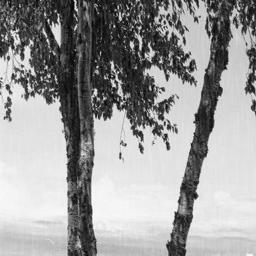

In [31]:
toPIL = trans.ToPILImage()
toPIL(cover_img_A[0])

torch.Size([1, 512, 1024])


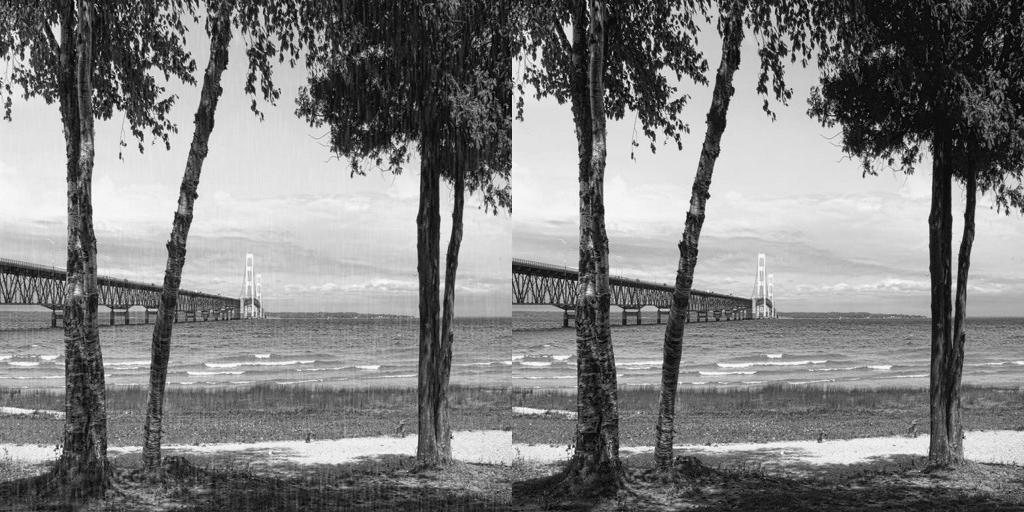

In [38]:
image = data[0]
print(image.size())
toPIL(image)

In [41]:

imageA = image[:, :, 0:512]


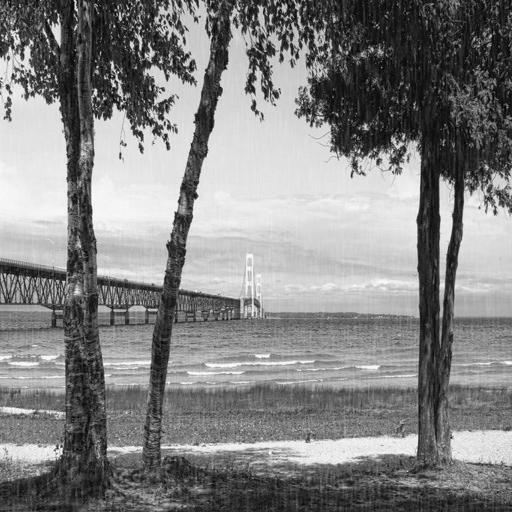

In [42]:
toPIL(imageA)

In [1]:
os.getcwd()

'e:\\watermark\\Deep-Model-Watermarking\\Initial stage'

In [14]:
import numpy as np
import torch
imageSize = 256
patch = (1, imageSize // 2 ** 4, imageSize // 2 ** 4)

a = torch.FloatTensor(np.ones((16, *patch)))

In [15]:
print(a.size())

torch.Size([16, 1, 16, 16])


In [17]:
from pathlib import Path
import os

# dataset preprocess

In [47]:
def mkdirs(path):
    if not os.path.exists(path):
        os.makedirs(path)

## debone

In [48]:
trainpath = 'E:\\watermark_dataset\\debone\\train'
validpath = 'E:\\watermark_dataset\\debone\\valid'
testpath = 'E:\\watermark_dataset\\debone\\test'

mkdirs(trainpath)
mkdirs(validpath)
mkdirs(testpath)


In [28]:
path = "E:\dataset\images"
files = os.listdir(path)
tar_files = files[1:]

In [50]:
import tarfile
name_list = []
for tar in tar_files:
    with tarfile.open(os.path.join(path, tar)) as t:
        for i in t.getmembers():
            name_list.append((tar, i.name))

In [51]:
print(len(name_list))

112132


## derain

In [128]:
trainpath = 'E:\\watermark_dataset\\derain\\train'
validpath = 'E:\\watermark_dataset\\derain\\valid'
testpath = 'E:\\watermark_dataset\\derain\\test'

mkdirs(trainpath)
mkdirs(validpath)
mkdirs(testpath)


In [129]:
derain_path = "E:\\derain"
derain_imgs = []
for root, subdir, files in os.walk(derain_path):
    if len(files)>0:
        #print(root)
        #print(files[:5])
        for img in files:
            derain_imgs.append((root, img))
            



In [96]:
len(derain_imgs)
derain_imgs[1]


('E:\\derain\\train\\Rain_Light', '117.jpg')

In [87]:
range(14201)

range(0, 14201)

In [130]:
import random

random.shuffle(derain_imgs)

In [131]:
derain_imgs = derain_imgs[:12100]
len(derain_imgs)
traindata = derain_imgs[:6000]
gandata = derain_imgs[6000:12000]
testdata = derain_imgs[12000:]
print(len(traindata), len(gandata), len(testdata))

6000 6000 100


In [132]:
len(list(set(traindata)))

6000

In [116]:
index

6000

In [108]:
import shutil
for arr in gandata:
    ori_path = os.path.join(derain_path, os.path.join(arr[0], arr[1]))
    #print(ori_path)
    new_path = os.path.join(validpath, arr[1])
    #print(new_path)
    shutil.copyfile(ori_path, new_path)

In [100]:
import shutil
for arr in testdata:
    ori_path = os.path.join(derain_path, os.path.join(arr[0], arr[1]))
    #print(ori_path)
    new_path = os.path.join(testpath, arr[1])
    #print(new_path)
    shutil.copyfile(ori_path, new_path)

In [127]:
for root, _, images in os.walk("E:\\watermark_dataset\\derain\\train"):
    print(root)
    print(len(images))

E:\watermark_dataset\derain\train
3953


In [ ]:
mkdirs(trainpath)
mkdirs(validpath)
mkdirs(testpath)

In [138]:
c = os.walk("E:\\watermark_dataset\\derain\\train")

<generator object walk at 0x000001CFAD49CF20>